<a href="https://colab.research.google.com/github/Mel-iza/Data-Science-e-Machine-Learning-Tera/blob/main/Notebooks/Model/Modelagem_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import sklearn 
from sklearn.metrics import classification_report
from sklearn import pipeline
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import nltk
from nltk import FreqDist
from nltk.stem import RSLPStemmer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


In [10]:
from google.colab import files

def save_and_download_file(data, file_name):
  file_name = file_name
  data.to_csv(file_name+'.csv', header=True, index=False, encoding='utf-8')
  files.download(file_name+'.csv') 

In [ ]:
data = pd.read_csv('/content/ultimate_data1_preprocessed_for_model.csv')
sample = data.sample(400)

In [2]:
import pandas as pd

# Carregue o dataset completo
dataset = pd.read_csv('/content/ultimate_data1_preprocessed_for_model.csv')

# Defina o tamanho da porção que você deseja carregar (por exemplo, 20%)
portion_size = int(len(dataset) * 0.5)

# Amostra aleatória da porção do dataset
data = dataset.sample(n=portion_size)

# Faça algo com a porção aleatória do dataset
# Por exemplo, imprima as primeiras linhas:
#print(random_portion.head())
data

,text,label,fonte,text_without_stop
24171,propina agnelo entregue canteiro obras mane ga...,1,fake.br corpus nilc,propina agnelo entregue canteiro obras mane ga...
33048,a anvisa autorizou hoje a realizacao de ensaio...,1,twitter anvisa_oficial,anvisa autorizou hoje realizacao ensaio clinic...
2139,carmen lucia reune fiquem proximos passaremos ...,0,fake.br corpus nilc,carmen lucia reune fiquem proximos passaremos ...
36051,nao se deixe levar por desinformacao variola d...,1,twitter dogarrett,deixe levar desinformacao variola macaco pode ...
25156,de abril de h sorocaba com recordes de morte...,1,veritas,abril sorocaba recordes mortes covid prefeitur...
...,...,...,...,...
12147,uma mulher saudavel de anos morre minutos apo...,0,telegram anti_vacinas,mulher saudavel anos morre minutos apos tomar ...
34437,projecoeslevando em conta o baixo indice de te...,1,twitter contagemcorona1,projecoeslevando conta baixo indice testagem s...
32779,circula nas redes sociais que um jovem tentou ...,1,twitter agencialupa,circula redes sociais jovem tentou tomar vacin...
2785,lucas lucco faz linda homenagem chapecoense va...,0,fake.br corpus nilc,lucas lucco linda homenagem chapecoense jogo i...


In [26]:
save_and_download_file(data, 'data_urgent')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd 

data = pd.read_csv('/content/ultimate_data1_preprocessed_for_model.csv')
data['label'] = data['label'].astype(int)
data['label'] = data['label'].astype('category')
data['text'] = data['text'].astype(str)
data['text_without_stop'] = data['text_without_stop'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42665 entries, 0 to 42664
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   text               42665 non-null  object  
 1   label              42665 non-null  category
 2   fonte              42665 non-null  object  
 3   text_without_stop  42665 non-null  object  
dtypes: category(1), object(3)
memory usage: 1.0+ MB


In [3]:
data['label'] = data['label'].astype(int)
data['label'] = data['label'].astype('category')
data['text'] = data['text'].astype(str)
data['text_without_stop'] = data['text_without_stop'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21332 entries, 24171 to 18503
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   text               21332 non-null  object  
 1   label              21332 non-null  category
 2   fonte              21332 non-null  object  
 3   text_without_stop  21332 non-null  object  
dtypes: category(1), object(3)
memory usage: 687.6+ KB


In [3]:
data

,text,label,fonte,text_without_stop
0,nostradamus previu o coronavirus,0,veritas,nostradamus previu coronavirus
1,a nova variante do sarscov e mais letal e nao ...,0,veritas,nova variante sarscov letal afetada vacinas
2,mensagem que mostra um link que leva a um site...,0,veritas,mensagem mostra link leva site supostamente po...
3,inalacao de bicarbonato de sodio com agua sani...,0,veritas,inalacao bicarbonato sodio agua sanitaria ajud...
4,anvisa registra novos obitos por vacinas nas u...,0,veritas,anvisa registra novos obitos vacinas ultimas h...
...,...,...,...,...
42660,dash atualizado contabilizadas ate h primeira...,1,twitter vacinacovidbr,dash atualizado contabilizadas primeiras segun...
42661,dash atualizado contabilizadas ate h primeira...,1,twitter vacinacovidbr,dash atualizado contabilizadas primeiras segun...
42662,dash atualizado contabilizadas ate h primeira...,1,twitter vacinacovidbr,dash atualizado contabilizadas primeiras segun...
42663,dash atualizado contabilizadas ate h primeira...,1,twitter vacinacovidbr,dash atualizado contabilizadas primeiras segun...


In [5]:
data = pd.read_csv('data_urgent.csv')
data['label'] = data['label'].astype(int)
data['label'] = data['label'].astype('category')
data['text'] = data['text'].astype(str)
data['text_without_stop'] = data['text_without_stop'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21332 entries, 0 to 21331
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   text               21332 non-null  object  
 1   label              21332 non-null  category
 2   fonte              21332 non-null  object  
 3   text_without_stop  21332 non-null  object  
dtypes: category(1), object(3)
memory usage: 521.0+ KB


In [6]:
data['label'].value_counts()

1    10783
0    10549
Name: label, dtype: int64

In [20]:
modelos = {
          "Regressão Logística": LogisticRegressionCV(max_iter=1000),
          "XGBoost": XGBClassifier(),
          "Naive Bayes":GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVM": SVC(),
          "AdaBoost":AdaBoostClassifier()
          }

In [7]:
modelos = {
          "SVM": SVC(),
          "AdaBoost":AdaBoostClassifier()
          }

In [39]:
data

,text,label,fonte,text_without_stop
0,propina agnelo entregue canteiro obras mane ga...,1,fake.br corpus nilc,propina agnelo entregue canteiro obras mane ga...
1,a anvisa autorizou hoje a realizacao de ensaio...,1,twitter anvisa_oficial,anvisa autorizou hoje realizacao ensaio clinic...
2,carmen lucia reune fiquem proximos passaremos ...,0,fake.br corpus nilc,carmen lucia reune fiquem proximos passaremos ...
3,nao se deixe levar por desinformacao variola d...,1,twitter dogarrett,deixe levar desinformacao variola macaco pode ...
4,de abril de h sorocaba com recordes de morte...,1,veritas,abril sorocaba recordes mortes covid prefeitur...
...,...,...,...,...
21327,uma mulher saudavel de anos morre minutos apo...,0,telegram anti_vacinas,mulher saudavel anos morre minutos apos tomar ...
21328,projecoeslevando em conta o baixo indice de te...,1,twitter contagemcorona1,projecoeslevando conta baixo indice testagem s...
21329,circula nas redes sociais que um jovem tentou ...,1,twitter agencialupa,circula redes sociais jovem tentou tomar vacin...
21330,lucas lucco faz linda homenagem chapecoense va...,0,fake.br corpus nilc,lucas lucco linda homenagem chapecoense jogo i...


In [23]:
train_preprocessed_data = pd.concat([X_train, y_train], axis=1)
test_preprocessed_data = pd.concat([X_test, y_test], axis=1)

In [7]:
train_preprocessed_data

NameError: ignored

In [24]:
save_and_download_file(train_preprocessed_data, 'train_data')
save_and_download_file(test_preprocessed_data, 'test_data')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
print(f'Dados de treino: {X_train.shape + y_train.shape}')
print(f'Dados de teste: {X_test.shape + y_test.shape}')
print(f'Total: {X_train.shape[0]+X_test.shape[0]}')

Dados de treino: (14292, 14292)
Dados de teste: (7040, 7040)
Total: 21332


In [14]:
print(f'Dados de treino: {X_train.shape}')
print(f'Dados de teste: {X_test.shape}')

Dados de treino: (14292,)
Dados de teste: (7040,)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



# Instanciar o modelo de Regressão Logística
modelo = LogisticRegression()

# Treinar o modelo com os dados de treinamento
modelo.fit(X_train_df, y_train)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test_df)

# Calcular metricas
accuracy = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='balanced_accuracy').mean()
f1_weighted = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='f1_weighted').mean()
recall_weighted = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='recall_weighted').mean()
precision_weighted = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='precision_weighted').mean()

print("Acurácia", round(accuracy, 3))
print("f1", round(f1_weighted, 3))
print("recall",round(recall_weighted, 3))
print("precision",  round(precision_weighted, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Acurácia 0.933
f1 0.933
recall 0.933
precision 0.934


In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [18]:
import joblib
import torch

dict_metrica = {}
dict_metrica["Tecnica Utilizada"] = ["Texto padronizado"]


for nome, modelo in modelos.items():
    # Ajustar o modelo com os dados de treinamento
    modelo.fit(X_train_df, y_train)
    
    # Fazer previsões nos dados de teste
    y_pred = modelo.predict(X_test_df)

    accuracy = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='balanced_accuracy').mean()
    f1_weighted = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='f1_weighted').mean()
    recall_weighted = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='recall_weighted').mean()
    precision_weighted = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='precision_weighted').mean()
    

    dict_metrica[nome] = {"acurácia":round(accuracy, 3),
                          "f1_weighted":round(f1_weighted, 3),
                          "recall_weighted":round(recall_weighted, 3),
                          "precision_weighted":round(precision_weighted, 3)}

    caminho_destino = '/content/drive/MyDrive/modelos_tcc/'+'textopadronizado_'+nome.strip()  # Caminho onde você deseja salvar o modelo
    joblib.dump(modelo, caminho_destino+'.joblib')
    
    # Imprimir as métricas do modelo
    print("Acurácia", nome, round(accuracy, 3))
    print("f1", nome, round(f1_weighted, 3))
    print("recall", nome, round(recall_weighted, 3))
    print("precision", nome, round(precision_weighted, 3))
    print('\n')


KeyboardInterrupt: ignored

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/data_urgent.csv')
data['fonte'] = data['fonte'].astype(str)
data['text'] = data['text'].astype(str)
data['text_without_stop'] = data['text_without_stop'].astype(str)
data['label'] = data['label'].astype(int)
data['label'] = data['label'].astype('category')
data

,text,label,fonte,text_without_stop
0,propina agnelo entregue canteiro obras mane ga...,1,fake.br corpus nilc,propina agnelo entregue canteiro obras mane ga...
1,a anvisa autorizou hoje a realizacao de ensaio...,1,twitter anvisa_oficial,anvisa autorizou hoje realizacao ensaio clinic...
2,carmen lucia reune fiquem proximos passaremos ...,0,fake.br corpus nilc,carmen lucia reune fiquem proximos passaremos ...
3,nao se deixe levar por desinformacao variola d...,1,twitter dogarrett,deixe levar desinformacao variola macaco pode ...
4,de abril de h sorocaba com recordes de morte...,1,veritas,abril sorocaba recordes mortes covid prefeitur...
...,...,...,...,...
21327,uma mulher saudavel de anos morre minutos apo...,0,telegram anti_vacinas,mulher saudavel anos morre minutos apos tomar ...
21328,projecoeslevando em conta o baixo indice de te...,1,twitter contagemcorona1,projecoeslevando conta baixo indice testagem s...
21329,circula nas redes sociais que um jovem tentou ...,1,twitter agencialupa,circula redes sociais jovem tentou tomar vacin...
21330,lucas lucco faz linda homenagem chapecoense va...,0,fake.br corpus nilc,lucas lucco linda homenagem chapecoense jogo i...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21332 entries, 0 to 21331
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   text               21332 non-null  object  
 1   label              21332 non-null  category
 2   fonte              21332 non-null  object  
 3   text_without_stop  21332 non-null  object  
dtypes: category(1), object(3)
memory usage: 521.0+ KB


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X = data.text_without_stop
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=42)

In [8]:
print(f'Dados de treino: {X_train.shape + y_train.shape}')
print(f'Dados de teste: {X_test.shape + y_test.shape}')
print(f'Total: {X_train.shape[0]+X_test.shape[0]}')

Dados de treino: (14292, 14292)
Dados de teste: (7040, 7040)
Total: 21332


In [9]:
X_train

17093    ontem tarde assim caiaque meio grata acesso fa...
1370     analise trump homem pode realizar sonho reunia...
3090     tomasz wyszolmirskidepositphotos autores propo...
14974    nenhum momento historia humanidade discurso ab...
5038     zeballos alerta preocupado vacinacoes menores ...
                               ...                        
11284    romenia governo fechou todos centros vacinacao...
11964    protestos contra ditadura covid china desta wuhan
5390                         portugalnem tudo perdidofonte
860      protecao profissionais saude atuam linha frent...
15795    general chamou brasileiros malucos tiro sera p...
Name: text_without_stop, Length: 14292, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Criar o CountVectorizer
tokenizer = CountVectorizer(ngram_range=(1,1))

# Ajustar e transformar o CountVectorizer nos dados de treinamento
X_train_mat = tokenizer.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train_mat.todense())

# Transformar o CountVectorizer nos dados de teste
X_test_mat = tokenizer.transform(X_test)
X_test_df = pd.DataFrame(X_test_mat.todense())


In [11]:
modelos = {
          "Regressão Logística": LogisticRegressionCV(max_iter=1000),
          "XGBoost": XGBClassifier(),
          "Naive Bayes":GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(),
          "AdaBoost":AdaBoostClassifier(),
          "SVM": SVC()
          }

In [12]:
# treino e teste com standard scaler
import joblib
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

dict_metrica = {}
dict_metrica["Tecnica Utilizada"] = ["LDA_texto_padronizaao"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_df)  # Aplicar a escala aos dados de treinamento

for nome, modelo in modelos.items():
    modelo.fit(X_scaled, y_train)
    
    # Fazer previsões nos dados de teste escalados
    X_test_scaled = scaler.transform(X_test_df)
    y_pred = modelo.predict(X_test_scaled)

    accuracy = cross_val_score(modelo, X_test_scaled, y_pred, cv=3, scoring='balanced_accuracy').mean()
    f1_weighted = cross_val_score(modelo, X_test_scaled, y_pred, cv=3, scoring='f1_weighted').mean()
    recall_weighted = cross_val_score(modelo, X_test_scaled, y_pred, cv=3, scoring='recall_weighted').mean()
    precision_weighted = cross_val_score(modelo, X_test_scaled, y_pred, cv=3, scoring='precision_weighted').mean()
    

    dict_metrica[nome] = {"acurácia":round(accuracy, 3),
                          "f1_weighted":round(f1_weighted, 3),
                          "recall_weighted":round(recall_weighted, 3),
                          "precision_weighted":round(precision_weighted, 3)}

    caminho_destino = '/content/drive/MyDrive/modelos_tcc/'+'LDA_texto_padronizado_'+nome.strip()  # Caminho onde você deseja salvar o modelo
    joblib.dump(modelo, caminho_destino+'.joblib')
    
    # métricas do modelo
    print("Acurácia", nome, round(accuracy, 3))
    print("f1", nome, round(f1_weighted, 3))
    print("recall", nome, round(recall_weighted, 3))
    print("precision", nome, round(precision_weighted, 3))
    print('\n')


Acurácia Regressão Logística 0.837
f1 Regressão Logística 0.846
recall Regressão Logística 0.849
precision Regressão Logística 0.857


Acurácia XGBoost 0.939
f1 XGBoost 0.94
recall XGBoost 0.94
precision XGBoost 0.94


Acurácia Naive Bayes 0.717
f1 Naive Bayes 0.717
recall Naive Bayes 0.724
precision Naive Bayes 0.74


Acurácia Decision Tree 0.852
f1 Decision Tree 0.856
recall Decision Tree 0.86
precision Decision Tree 0.857


Acurácia AdaBoost 0.958
f1 AdaBoost 0.961
recall AdaBoost 0.961
precision AdaBoost 0.962


Acurácia SVM 0.725
f1 SVM 0.781
recall SVM 0.798
precision SVM 0.808




In [ ]:
import pandas as pd 

data = pd.read_csv('/content/data_urgent.csv')
data['fonte'] = data['fonte'].astype(str)
data['text'] = data['text'].astype(str)
data['text_without_stop'] = data['text_without_stop'].astype(str)
data['label'] = data['label'].astype(int)
data['label'] = data['label'].astype('category')
data

Pipeline

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = data.text
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=42)

In [ ]:
modelos = {
          "Regressão Logística": LogisticRegressionCV(max_iter=1000),
          "XGBoost": XGBClassifier(),
          "Naive Bayes":GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(),
          "AdaBoost":AdaBoostClassifier(),
          "SVM": SVC()
          }

In [ ]:
from sklearn.pipeline import Pipeline
dict_metrica = {}
dict_metrica["Tecnica Utilizada"] = ["LDA_texto_padronizaao"]

# Criar o pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 1))),
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

for nome, modelo in modelos.items():
    # Treinar o modelo utilizando o pipeline
    pipeline.fit(X_train, y_train)

    # Fazer previsões nos dados de teste
    y_pred = pipeline.predict(X_test)

    # Calcular as métricas utilizando validação cruzada
    accuracy = cross_val_score(pipeline, X_test, y_pred, cv=3, scoring='balanced_accuracy').mean()
    f1_weighted = cross_val_score(pipeline, X_test, y_pred, cv=3, scoring='f1_weighted').mean()
    recall_weighted = cross_val_score(pipeline, X_test, y_pred, cv=3, scoring='recall_weighted').mean()
    precision_weighted = cross_val_score(pipeline, X_test, y_pred, cv=3, scoring='precision_weighted').mean()

    # Salvar o modelo treinado
    caminho_destino = '/content/drive/MyDrive/modelos_tcc/' + 'LDA_texto_padronizado'
    joblib.dump(pipeline, caminho_destino + '.joblib')

    # Métricas do modelo
    dict_metrica[nome] = {
        "acurácia": round(accuracy, 3),
        "f1_weighted": round(f1_weighted, 3),
        "recall_weighted": round(recall_weighted, 3),
        "precision_weighted": round(precision_weighted, 3)
    }

    print("Acurácia:", round(accuracy, 3))
    print("F1:", round(f1_weighted, 3))
    print("Recall:", round(recall_weighted, 3))
    print("Precision:", round(precision_weighted, 3))
    print('\n')


In [30]:
caminho_destino = '/content/drive/MyDrive/modelos_tcc/'+'textopadronizado_'+nome.strip()  # Caminho onde você deseja salvar o modelo
joblib.dump(modelo, caminho_destino+'.joblib')

['/content/drive/MyDrive/modelos_tcc/textopadronizado_SVM.joblib']

In [33]:
dict_metrica

{'Tecnica Utilizada': ['Texto padronizado'],
 'AdaBoost': {'acurácia': 0.955,
  'f1_weighted': 0.956,
  'recall_weighted': 0.956,
  'precision_weighted': 0.957}}

In [1]:
x = pd.read_csv('data_urgent.csv')
x

NameError: ignored

In [ ]:
dict_metrica

loading e inferencia do modelo

In [ ]:
loaded_model = joblib.load('/content/drive/MyDrive/modelos_tcc/Naive Bayes.joblib')

In [ ]:
frase = 'eu não queria vacinar minha filha mas nao tive opçao, vacina é um veneno'

vectorizer = TfidfVectorizer()

frase = vectorizer.fit_transform([frase])
frase_transformada = vectorizer.transform([frase])

yhat = loaded_model.predict_proba([frase_transformada])
yhat

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()

frase = 'eu não queria vacinar minha filha mas nao tive opçao, vacina é um veneno'
frase_transformada = vectorizer.fit([frase.lower()])
frase_transformada = vectorizer.transform([frase.lower()])  # Converter para letras minúsculas
yhat = loaded_model.predict_proba(frase_transformada)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X = data.text_without_stop
y = data.label

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=42)

print(f'Dados de treino: {X_train.shape + y_train.shape}')
print(f'Dados de teste: {X_test.shape + y_test.shape}')
print(f'Total: {X_train.shape[0]+X_test.shape[0]}')

# Criar o CountVectorizer
tokenizer = CountVectorizer(ngram_range=(1,1))

# Ajustar e transformar o CountVectorizer nos dados de treinamento
X_train_mat = tokenizer.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train_mat.todense())

# Transformar o CountVectorizer nos dados de teste
X_test_mat = tokenizer.transform(X_test)
X_test_df = pd.DataFrame(X_test_mat.todense())


Dados de treino: (56, 56)
Dados de teste: (29, 29)
Total: 85


In [ ]:
import joblib
dict_metrica = {}
dict_metrica["Tecnica Utilizada"] = ["Texto sem stop words"]

for nome, modelo in modelos.items():
    # Ajustar o modelo com os dados de treinamento
    modelo.fit(X_train_df, y_train)
    
    # Fazer previsões nos dados de teste
    y_pred = modelo.predict(X_test_df)

    accuracy = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='balanced_accuracy').mean()
    f1_weighted = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='f1_weighted').mean()
    recall_weighted = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='recall_weighted').mean()
    precision_weighted = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='precision_weighted').mean()
    

    dict_metrica[nome] = {"acurácia":round(accuracy, 3),
                          "f1_weighted":round(f1_weighted, 3),
                          "recall_weighted":round(recall_weighted, 3),
                          "precision_weighted":round(precision_weighted, 3)}

    caminho_destino = '/content/drive/MyDrive/modelos_tcc/'+'text_semstopwords_'+nome.strip()  # Caminho onde você deseja salvar o modelo
    joblib.dump(modelo, caminho_destino+'.joblib')
    
    # Imprimir as métricas do modelo
    print("Acurácia", nome, round(accuracy, 3))
    print("f1", nome, round(f1_weighted, 3))
    print("recall", nome, round(recall_weighted, 3))
    print("precision", nome, round(precision_weighted, 3))
    print('\n')

The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
The least populated class in y has only 2 members, which is less than n_splits=5.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
The least populated class in y has only 2

Acurácia Regressão Logística 0.5
f1 Regressão Logística 0.847
recall Regressão Logística 0.896
precision Regressão Logística 0.803




Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Acurácia XGBoost 0.542
f1 XGBoost 0.496
recall XGBoost 0.619
precision XGBoost 0.49




Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Acurácia Naive Bayes 0.646
f1 Naive Bayes 0.841
recall Naive Bayes 0.863
precision Naive Bayes 0.834




Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Acurácia Decision Tree 0.556
f1 Decision Tree 0.626
recall Decision Tree 0.652
precision Decision Tree 0.541


Acurácia SVM 1.0
f1 SVM 1.0
recall SVM 1.0
precision SVM 1.0


Acurácia AdaBoost 0.56
f1 AdaBoost 0.607
recall AdaBoost 0.789
precision AdaBoost 0.585




Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
dict_metrica

{'Tecnica Utilizada': ['Texto sem stop words'],
 'Regressão Logística': {'acurácia': 0.5,
  'f1_weighted': 0.847,
  'recall_weighted': 0.896,
  'precision_weighted': 0.803},
 'XGBoost': {'acurácia': 0.542,
  'f1_weighted': 0.496,
  'recall_weighted': 0.619,
  'precision_weighted': 0.49},
 'Naive Bayes': {'acurácia': 0.646,
  'f1_weighted': 0.841,
  'recall_weighted': 0.863,
  'precision_weighted': 0.834},
 'Decision Tree': {'acurácia': 0.556,
  'f1_weighted': 0.626,
  'recall_weighted': 0.652,
  'precision_weighted': 0.541},
 'SVM': {'acurácia': 1.0,
  'f1_weighted': 1.0,
  'recall_weighted': 1.0,
  'precision_weighted': 1.0},
 'AdaBoost': {'acurácia': 0.56,
  'f1_weighted': 0.607,
  'recall_weighted': 0.789,
  'precision_weighted': 0.585}}

In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
modelo = ...  # Seu objeto de modelo

caminho_destino = 'content/modelo.joblib'  # Caminho onde você deseja salvar o modelo
joblib.dump(modelo, caminho_destino)


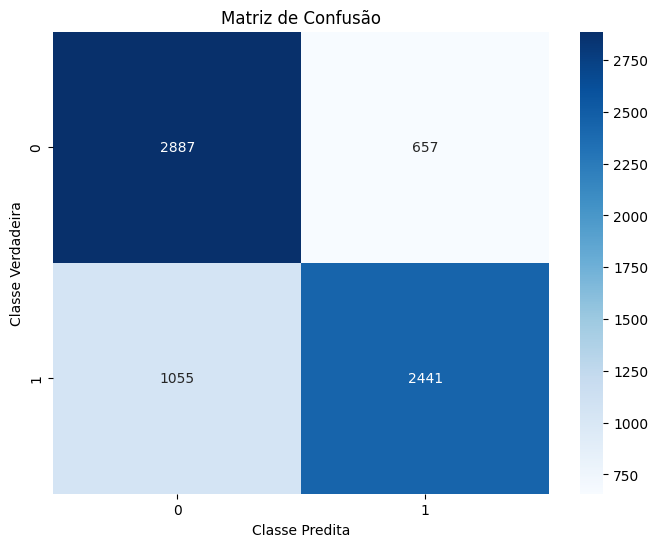

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fazer previsões com o modelo
y_pred = modelo.predict(X_test_df)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()


In [36]:
print(classification_report(y_test, y_pred, target_names=['Fake', 'True']))

              precision    recall  f1-score   support

        Fake       0.73      0.81      0.77      3544
        True       0.79      0.70      0.74      3496

    accuracy                           0.76      7040
   macro avg       0.76      0.76      0.76      7040
weighted avg       0.76      0.76      0.76      7040



In [37]:
from sklearn.metrics import roc_curve, auc

# essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc(fpr, tpr)

0.756421398722048

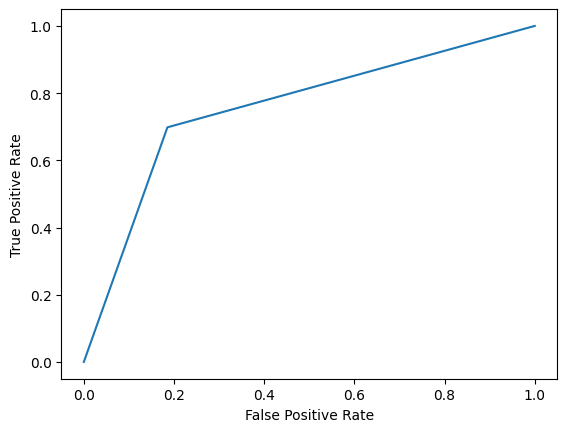

In [38]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
!pip install git+https://github.com/slundberg/shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/slundberg/shap to /tmp/pip-req-build-xuw0k_nb
  Running command git clone --filter=blob:none --quiet https://github.com/slundberg/shap /tmp/pip-req-build-xuw0k_nb
  Resolved https://github.com/slundberg/shap to commit b2a60a31edcc22ed41778cbe3ef93a499d76277f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.41.0-cp310-cp310-linux_x86_64.whl size=2596263 sha256=bc43f9163d7adba0731af105a43308796e5cfe274e149ac3e5750c90ed5c3595
  Stored in directory: /tmp/pip-ephem-wheel-cache-1w0sdyhy/wheels/c4/17/a7/79249f9ff6d75b90b5d70a2b93dd8f854f32c9dff553d10a41
Successfully built shap


In [ ]:
import shap

explainer = shap.Explainer(modelo, masker=LogisticRegression())
shap_values = explainer.shap_values(X_train_df)
shap.summary_plot(shap_values[1], X_train_df, plot_type='bar')

In [ ]:
from sklearn.model_selection import cross_val_score



for nome, modelo in modelos.items():
    modelo.fit(X_train_df, y_train)
    
    y_pred = modelo.predict(X_test_df)
    
    accuracy = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='accuracy').mean()
    f1 = cross_val_score(modelo, X_test_df, y_pred, cv=3, scoring='f1').mean()
    

    print(nome, accuracy)
    print(nome, f1)


Regressão Logística 0.7222222222222222
Regressão Logística 0.3
XGBoost 0.5888888888888889
XGBoost 0.4481481481481482
Naive Bayes 0.8962962962962964
Naive Bayes 0.9453044375644994
Decision Tree 0.8962962962962964
Decision Tree 0.8571428571428571
SVM 1.0
SVM 1.0
AdaBoost 0.6925925925925925
AdaBoost 0.5476190476190477


In [ ]:
dict_metrica = {}
dict_metrica["Tecnica Utilizada"] = ["Bag Of Words sem stopwords"]


# Cross validation para avaliar a acurácia dos modelos.
for nome, modelo in modelos.items():
    accuracy = cross_val_score(modelo, X_df, y, cv = 3, scoring='accuracy').mean() # Definindo 3 folds e fazendo a média
    dict_metrica[nome] = [round(accuracy,4)]
    
# Mostrando métricas
df_metricas = pd.DataFrame(dict_metrica)
df_metricas